# <center> 👉 class_11_5 » _Face Detect and Recognition Implementation_ </center>  


# **Face Detect and Recognition Implementation**

The ability of Machine System to recognize an person's face in an image.   
We wiil teach the machine how to detect and recognize a face.

We will be using the Open-Source Tool for this purpose, one of them is very famous and extensively used is 'Dlib' that has 'face_recognition' package   
that gives us access to pre-created models for face-recognition purposes and related use-case projects.

### 1. install the face_recognition package in python

In [1]:
!pip install face_recognition

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566186 sha256=89b3b6a7540c15a1c35681d67de31276d4543861cb897ad282c79bd6fe5fbea7
  Stored in directory: c:\users\owner\appdata\local\pip\cache\wheels\6a\e1\1a\8969952b51c25409d5b96ecb09603de12b8534bd6d68e6e7d1
Successfully built face-recognition-models


### 2. **FACE DETECTION**:   
Let us perform face detection first and  
see if our model identifies correct number of faces in the image.

Found 4 face(s) in the input image


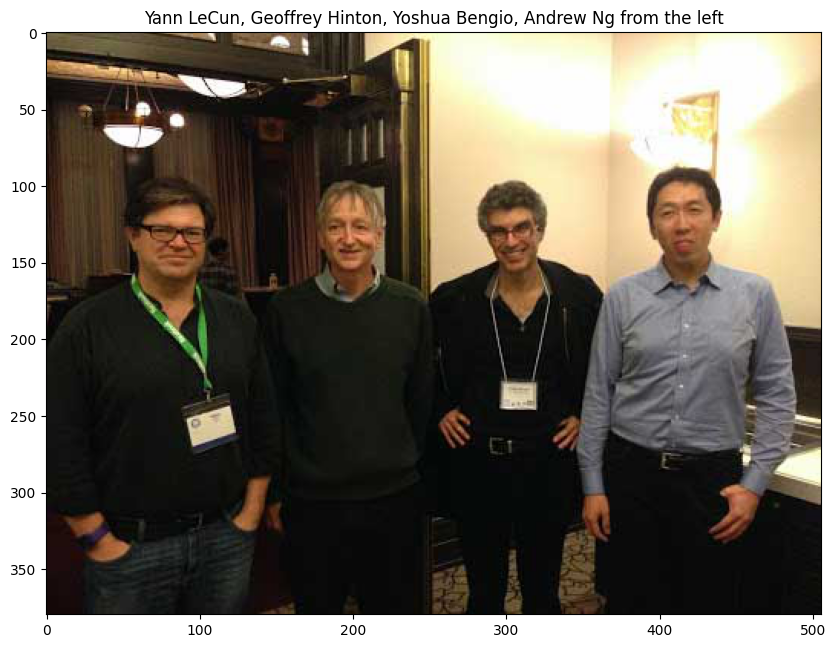

In [3]:
%matplotlib inline
import face_recognition
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.pyplot import Circle
import numpy as np
import cv2
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(10, 10), dpi=100)
# image = cv2.imread('./images/practice_img/people3.jpg')
image = cv2.imread('./images/4men.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.title('Yann LeCun, Geoffrey Hinton, Yoshua Bengio, Andrew Ng from the left')
face_locations = face_recognition.face_locations(image)
num_faces = len(face_locations)
print('Found {} face(s) in the input image'.format(num_faces)) # showing the number of faces detected in it

Detection of faces in the image and drawing rectangles around the faces

A face is located a pixel location on Left: 177, Top: 118, Right: 213, Bottom: 154
A face is located a pixel location on Left: 397, Top: 106, Right: 433, Bottom: 142
A face is located a pixel location on Left: 285, Top: 118, Right: 321, Bottom: 154
A face is located a pixel location on Left: 64, Top: 118, Right: 108, Bottom: 161


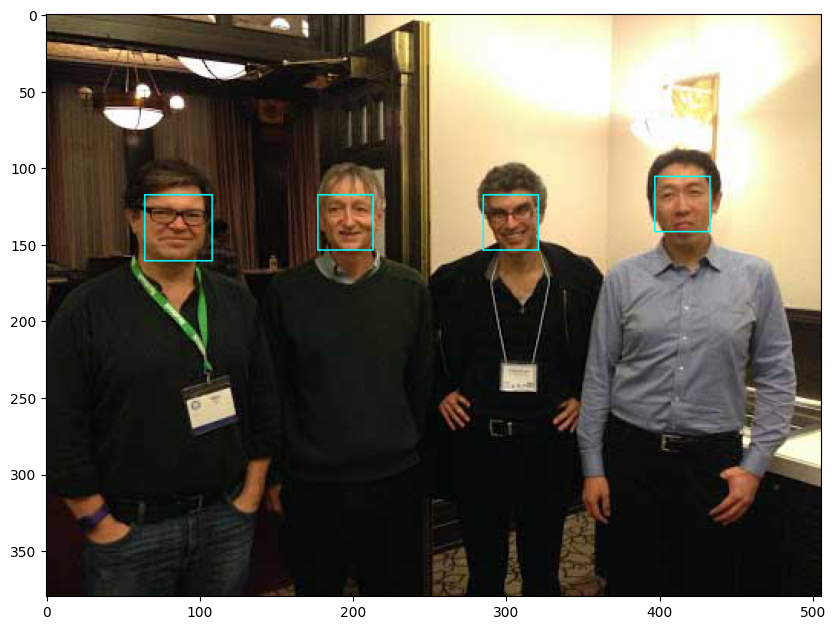

In [4]:
#Detection of faces in the image and drawing rectangles around the faces with generating rectange coordinate information
figure(figsize=(10, 10), dpi=100)
for face_location in face_locations:
    top, right, bottom, left = face_location
    x, y, w, h = left, top, right, bottom
    print('A face is located a pixel location on Left: {}, Top: {}, Right: {}, Bottom: {}'. format(x,y,w,h))
    rect_img = cv2.rectangle(image,(x,y), (w, h), (0, 255,255),1)
plt.imshow(rect_img)
plt.show()

### 3. Source Images for Face Recognition

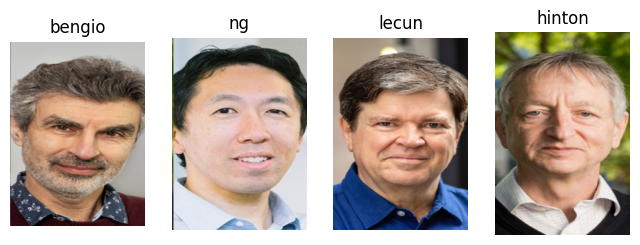

In [7]:
#Reading in the images from our custom dataset/ Loading images(dataset)

image = cv2.imread('./images/practice_img/bengio.jpg') 
bengio = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

image = cv2.imread('./images/practice_img/ng.jpg') 
ng = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

image = cv2.imread('./images/practice_img/lecun.jpg') 
lecun = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

image = cv2.imread('./images/practice_img/hinton.jpg') 
hinton = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(8, 8), dpi=100)

plt.subplot(141),plt.imshow(bengio),plt.title('bengio'),plt.axis('off')
plt.subplot(142),plt.imshow(ng),plt.title('ng'),plt.axis('off')
plt.subplot(143),plt.imshow(lecun),plt.title('lecun'),plt.axis('off')
plt.subplot(144),plt.imshow(hinton),plt.title('hinton'),plt.axis('off')
plt.show()

### 4. Generating Source Face encoding for each person

In [8]:
bengio_encoding = face_recognition.face_encodings(bengio)[0]
ng_encoding = face_recognition.face_encodings(ng)[0]
lecun_encoding = face_recognition.face_encodings(lecun)[0]
hinton_encoding = face_recognition.face_encodings(hinton)[0]

#Creating database of all known face encodings
src_encodings = [bengio_encoding, ng_encoding, lecun_encoding, hinton_encoding]

### 5. Load Tgt Img

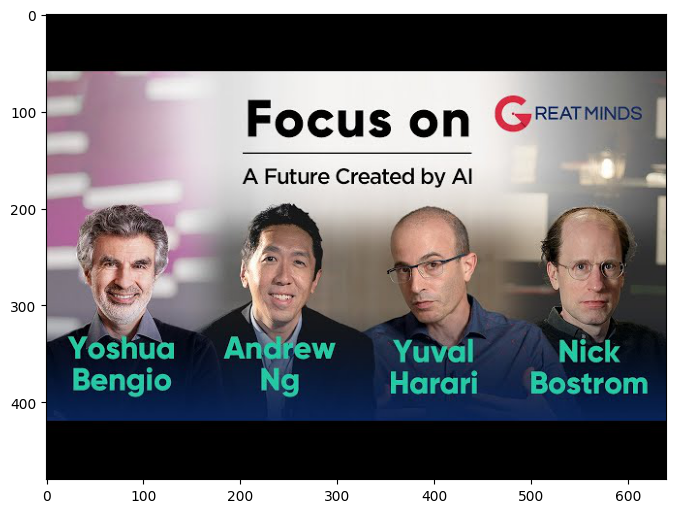

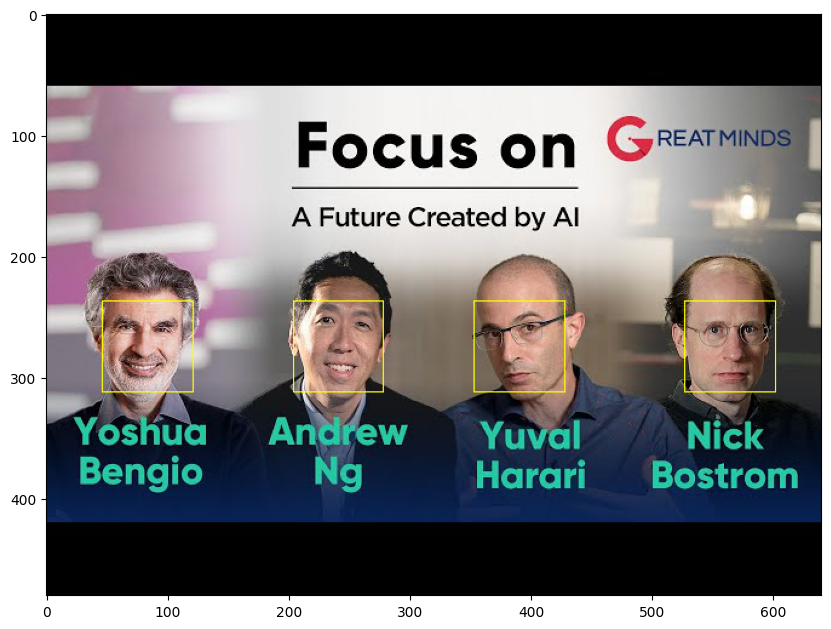

In [9]:
# Loading an image which is not present in our dataset for checking
image_tgt = cv2.imread('./images/practice_img/4men_tgt.jpg')
tgt_img = cv2.cvtColor(image_tgt, cv2.COLOR_BGR2RGB)
figure(figsize=(8, 8), dpi=100)
plt.imshow(tgt_img)
plt.show()

# draw Rectangles
face_locations = face_recognition.face_locations(image_tgt)
figure(figsize=(10, 10), dpi=100)

for face_location in face_locations:
    top, right, bottom, left = face_location
    x, y, w, h = left, top, right, bottom
    rect_img = cv2.rectangle(image_tgt,(x,y), (w, h), (0, 255,255),1)
plt.imshow(cv2.cvtColor(rect_img, cv2.COLOR_BGR2RGB))
plt.show()

### 6. Generating the face encoding of the person in the tgt image

In [10]:
# Generating the face encoding of the person in the tgt image

from scipy.spatial import distance

tgt_encoding = face_recognition.face_encodings(tgt_img)

for tgt_face in tgt_encoding: # more than one face in the image
    results = []
    for src_face in src_encodings:           # Computing Euclidean Distance
        d = distance.euclidean(src_face, tgt_face)
        results.append(d)
    threshold = 0.6
    results = np.array(results) <=threshold
    name = 'Unknown' 
    if results[0]:
        name = 'Yoshua Bengio'  # Sundar Pichai
    elif results[1]:
        name = 'Andrew Ng'  # Satya Nadella
    elif results[2]:
        name = 'Yann LeCun'   # Indra Nooyi
    elif results[3]:
        name = 'Geoffrey Hinton'  # Ajaypal Singh Bagha
    print(f'Found {name} in the photo!')


Found Andrew Ng in the photo!
Found Unknown in the photo!
Found Yoshua Bengio in the photo!
Found Unknown in the photo!
